In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X_train = np.loadtxt("/content/drive/MyDrive/train_X.csv", delimiter=",").T
Y_train = np.loadtxt("/content/drive/MyDrive/train_label.csv", delimiter=",").T

X_test = np.loadtxt("/content/drive/MyDrive/test_X.csv", delimiter=",").T
Y_test = np.loadtxt("/content/drive/MyDrive/test_label.csv", delimiter=",").T

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 1000)
(10, 1000)
(784, 350)
(10, 350)


#Sample Image

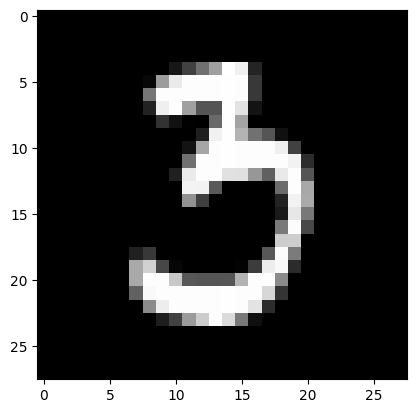

In [6]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28,28), cmap="gray")
plt.show()

#Activation Functions

In [7]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x, 0)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX, axis = 0)

In [8]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

#Parameter Initialization

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

#Neural Network Model Defnition

In [10]:
def forward_propagation(x, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

In [11]:
def cost_function(a2, y):
    m = y.shape[1]

    cost = -(1/m)*np.sum(y*np.log(a2))

    return cost

In [12]:
def backward_prop(x, y, parameters, forward_cache):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients

In [13]:
def update_parameters(parameters, gradients, learning_rate):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

#Model

In [14]:
def model(x, y, n_h, learning_rate, iterations):

    n_x = x.shape[0]
    n_y = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):

        forward_cache = forward_propagation(x, parameters)

        cost = cost_function(forward_cache['a2'], y)

        gradients = backward_prop(x, y, parameters, forward_cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)

    return parameters, cost_list

#Cost vs Iterations

In [15]:
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.328795447588713
Cost after 10 iterations is : 1.1494164968606342
Cost after 20 iterations is : 0.802559313646114
Cost after 30 iterations is : 0.6409922321089818
Cost after 40 iterations is : 0.54457063739173
Cost after 50 iterations is : 0.47847916828778625
Cost after 60 iterations is : 0.4292038357947075
Cost after 70 iterations is : 0.3903930867523762
Cost after 80 iterations is : 0.35864352751372736
Cost after 90 iterations is : 0.331949710924035


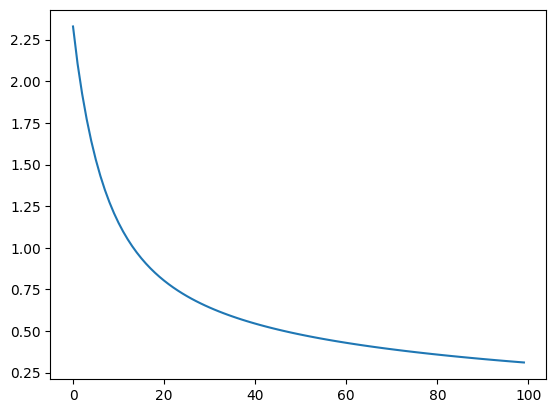

In [16]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

#Accuracy of the model

In [17]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']

    a_out = np.argmax(a_out, 0)

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [18]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 95.3 %
Accuracy of Test Dataset 84.57 %


#Digit Prediction

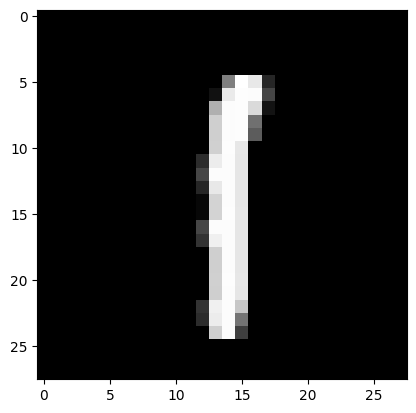

Above image is 1


In [20]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Above image is", a_pred[0])